DENOISING USING DIFFUSION FILTER

In [3]:
import numpy as np
import warnings
import cv2

def anisodiff(img,niter=1,kappa=50,gamma=0.1,step=(1.,1.),option=1,ploton=True):
    """
    Anisotropic diffusion.

    Usage:
    imgout = anisodiff(im, niter, kappa, gamma, option)

    Arguments:
            img    - input image
            niter  - number of iterations
            kappa  - conduction coefficient 20-100 ?
            gamma  - max value of .25 for stability
            step   - tuple, the distance between adjacent pixels in (y,x)
            option - 1 Perona Malik diffusion equation No 1(high contrast over low contrast)
                     2 Perona Malik diffusion equation No 2(wider regions over smaller ones)
            ploton - if True, the image will be plotted on every iteration

    Returns:
            imgout   - diffused image.

    kappa controls conduction as a function of gradient.

    gamma controls speed of diffusion

    step is used to scale the gradients
    """
    if img.ndim == 3:
        warnings.warn("Only grayscale images allowed, converting to 2D matrix")
        img = img.mean(2)

    # initialize output array
    img = img.astype('float32')
    imgout = img.copy()

    # initialize some internal variables
    deltaS = np.zeros_like(imgout)
    deltaE = deltaS.copy()
    NS = deltaS.copy()
    EW = deltaS.copy()
    gS = np.ones_like(imgout)
    gE = gS.copy()

    # create the plot figure, if requested
    if ploton:
        import pylab as pl
        from time import sleep

        fig = pl.figure(figsize=(20,5.5),num="Anisotropic diffusion")
        ax1,ax2 = fig.add_subplot(1,2,1),fig.add_subplot(1,2,2)

        ax1.imshow(img,interpolation='nearest')
        ih = ax2.imshow(imgout,interpolation='nearest',animated=True)
        ax1.set_title("Original image")
        ax2.set_title("Iteration 0")

        fig.canvas.draw()

    for ii in range(niter):

        # calculate the diffs
        deltaS[:-1,: ] = np.diff(imgout,axis=0)
        deltaE[: ,:-1] = np.diff(imgout,axis=1)

        # conduction gradients (only need to compute one per dim!)
        if option == 1:
            gS = np.exp(-(deltaS/kappa)**2.)/step[0]
            gE = np.exp(-(deltaE/kappa)**2.)/step[1]
        elif option == 2:
            gS = 1./(1.+(deltaS/kappa)**2.)/step[0]
            gE = 1./(1.+(deltaE/kappa)**2.)/step[1]

        # update matrices
        E = gE*deltaE
        S = gS*deltaS

        # subtract a copy that has been shifted 'North/West' by one pixel
        NS[:] = S
        EW[:] = E
        NS[1:,:] -= S[:-1,:]
        EW[:,1:] -= E[:,:-1]

        # update the image
        imgout += gamma*(NS+EW)

        if ploton:
            iterstring = "Iteration %i" %(ii+1)
            ih.set_data(imgout)
            ax2.set_title(iterstring)
            fig.canvas.draw()
            # sleep(0.01)

    return imgout

In [4]:
pip install scipy==1.1.0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning:     `imread` is deprecated!
    `imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
    Use ``imageio.imread`` instead.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: UserWarning: Only grayscale images allowed, converting to 2D matrix


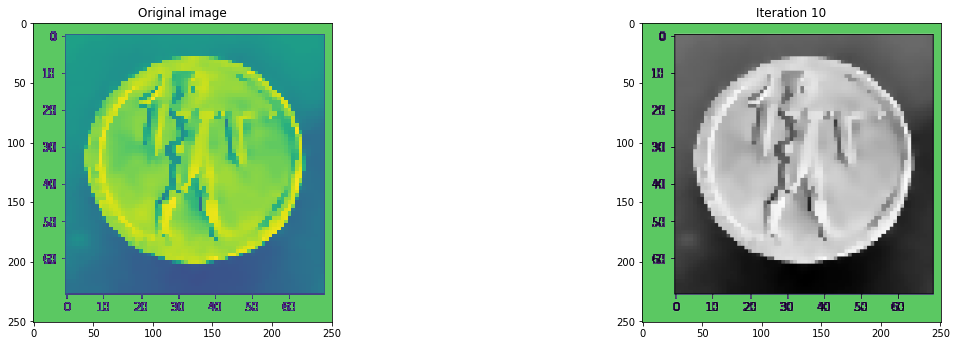

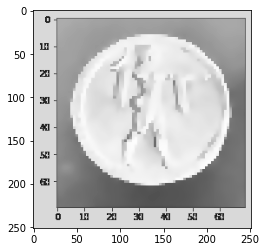

In [5]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
#from skimage.data import lena
from scipy.misc import imread
im = imread("coins.png")
#im = coins()[..., 0]
result = anisodiff(im, niter=10, kappa=25)
plt.imshow(im, cmap="Greys_r")
plt.figure()
plt.imshow(result, cmap="Greys_r")

CHECKING WITH DIFFERENT FILTERS

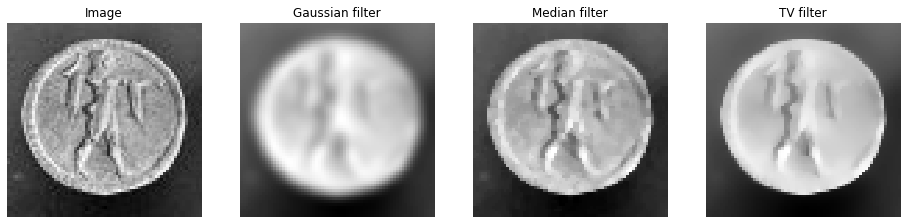

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data
from skimage import filters
from skimage import restoration

coins = data.coins()
gaussian_filter_coins = filters.gaussian(coins, sigma=2)
med_filter_coins = filters.median(coins, np.ones((3, 3)))
tv_filter_coins = restoration.denoise_tv_chambolle(coins, weight=0.1)

plt.figure(figsize=(16, 4))
plt.subplot(141)
plt.imshow(coins[10:80, 300:370], cmap='gray', interpolation='nearest')
plt.axis('off')
plt.title('Image')
plt.subplot(142)
plt.imshow(gaussian_filter_coins[10:80, 300:370], cmap='gray',
           interpolation='nearest')
plt.axis('off')
plt.title('Gaussian filter')
plt.subplot(143)
plt.imshow(med_filter_coins[10:80, 300:370], cmap='gray',
           interpolation='nearest')
plt.axis('off')
plt.title('Median filter')
plt.subplot(144)
plt.imshow(tv_filter_coins[10:80, 300:370], cmap='gray',
           interpolation='nearest')
plt.axis('off')
plt.title('TV filter')
plt.show()

IMAGE ENHANCEMENT

True

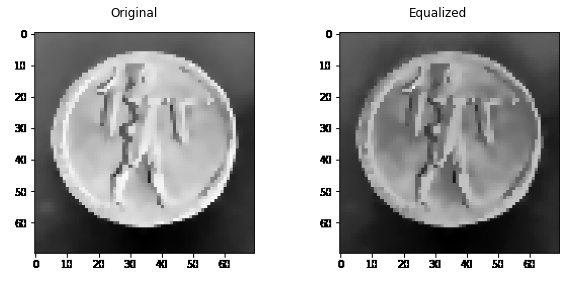

In [7]:
import numpy as np
import cv2
import json
from matplotlib import pyplot as plt

def read_this(image_file, gray_scale=False):
    image_src = cv2.imread(image_file)
    if gray_scale:
        image_src = cv2.cvtColor(image_src, cv2.COLOR_BGR2GRAY)
    else:
        image_src = cv2.cvtColor(image_src, cv2.COLOR_BGR2RGB)
    return image_src
def equalize_this(image_file, with_plot=False, gray_scale=False):
    image_src = read_this(image_file=image_file, gray_scale=gray_scale)
    if not gray_scale:
        r_image, g_image, b_image = cv2.split(image_src)

        r_image_eq = cv2.equalizeHist(r_image)
        g_image_eq = cv2.equalizeHist(g_image)
        b_image_eq = cv2.equalizeHist(b_image)

        image_eq = cv2.merge((r_image_eq, g_image_eq, b_image_eq))
        cmap_val = None
    else:
        image_eq = cv2.equalizeHist(image_src)
        cmap_val = 'gray'

    if with_plot:
        fig = plt.figure(figsize=(10, 20))

        ax1 = fig.add_subplot(2, 2, 1)
        ax1.axis("off")
        ax1.title.set_text('Original')
        ax2 = fig.add_subplot(2, 2, 2)
        ax2.axis("off")
        ax2.title.set_text("Equalized")

        ax1.imshow(image_src, cmap=cmap_val)
        ax2.imshow(image_eq, cmap=cmap_val)
        return True
    return image_eq
equalize_this(image_file='coins.png', with_plot=True)

SNR RATIO

In [13]:
import cv2
import numpy as np

x=cv2.imread('coins.png')
y=cv2.imread('coinsbb.png')
def compute_psnr(img1, img2):
    img1 = img1.astype(np.float64) / 255.
    img2 = img2.astype(np.float64) / 255.
    mse = np.mean((img1 - img2) ** 2)
    if mse == 0:
        return "Same Image"
    return 10 * math.log10(1. / mse)
print(compute_psnr(x,y))

6.805564015310086


In [11]:
import cv2
import numpy as np
import math
z=cv2.imread('coins.png')
r=cv2.imread('gaussb.png')
def compute_psnr(img1, img2):
    img1 = img1.astype(np.float64) / 255.
    img2 = img2.astype(np.float64) / 255.
    mse = np.mean((img1 - img2) ** 2)
    if mse == 0:
        return "Same Image"
    return 10 * math.log10(1. / mse)
print(compute_psnr(z,r))

5.938595966836322


IMAGE ENHANCEMENT

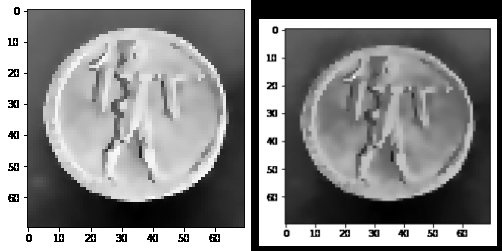

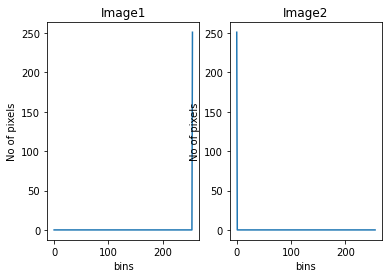

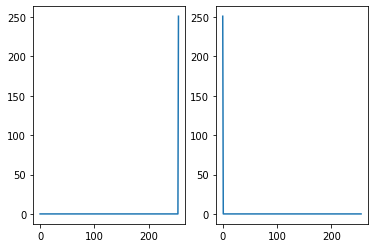

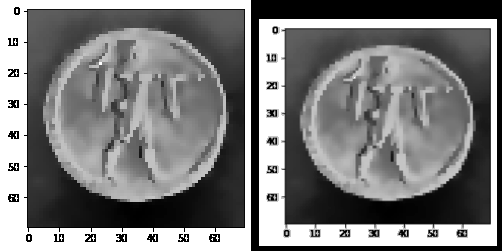

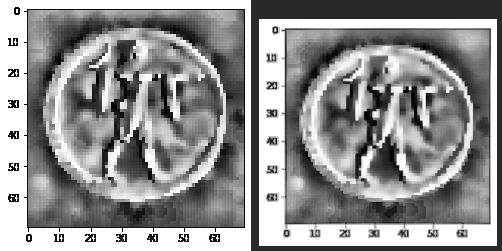

True

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
img= cv2.imread('coins.png')
img1=cv2.imread('coinsbb.png')
images=np.concatenate((img,img1),axis=1)
cv2_imshow(images)
cv2.waitKey(0)
cv2.destroyAllWindows()
gray_img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray_img1=cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
hist=cv2.calcHist(gray_img,[0],None,[256],[0,256])
hist1=cv2.calcHist(gray_img1,[0],None,[256],[0,256])
plt.subplot(121)
plt.title("Image1")
plt.xlabel('bins')
plt.ylabel("No of pixels")
plt.plot(hist)
plt.subplot(122)
plt.title("Image2")
plt.xlabel('bins')
plt.ylabel("No of pixels")
plt.plot(hist1)
plt.show()
gray_img_eqhist=cv2.equalizeHist(gray_img)
gray_img1_eqhist=cv2.equalizeHist(gray_img1)
hist=cv2.calcHist(gray_img_eqhist,[0],None,[256],[0,256])
hist1=cv2.calcHist(gray_img1_eqhist,[0],None,[256],[0,256])
plt.subplot(121)
plt.plot(hist)
plt.subplot(122)
plt.plot(hist1)
plt.show()
eqhist_images=np.concatenate((gray_img_eqhist,gray_img1_eqhist),axis=1)
cv2_imshow(eqhist_images)
cv2.waitKey(0)
cv2.destroyAllWindows()
clahe=cv2.createCLAHE(clipLimit=40)
gray_img_clahe=clahe.apply(gray_img_eqhist)
gray_img1_clahe=clahe.apply(gray_img1_eqhist)
images=np.concatenate((gray_img_clahe,gray_img1_clahe),axis=1)
cv2_imshow(images)
cv2.waitKey(0)
cv2.destroyAllWindows()
th=80
max_val=255
ret, o1 = cv2.threshold(gray_img_clahe, th, max_val, cv2.THRESH_BINARY)
cv2.putText(o1,"Thresh_Binary",(40,100),cv2.FONT_HERSHEY_SIMPLEX,2,(255,255,255),3,cv2.LINE_AA)
ret, o2 = cv2.threshold(gray_img_clahe, th, max_val, cv2.THRESH_BINARY_INV)
cv2.putText(o2,"Thresh_Binary_inv",(40,100),cv2.FONT_HERSHEY_SIMPLEX,2,(255,255,255),3,cv2.LINE_AA)
ret, o3 = cv2.threshold(gray_img_clahe, th, max_val, cv2.THRESH_TOZERO)
cv2.putText(o3,"Thresh_Tozero",(40,100),cv2.FONT_HERSHEY_SIMPLEX,2,(255,255,255),3,cv2.LINE_AA)
ret, o4 = cv2.threshold(gray_img_clahe, th, max_val, cv2.THRESH_TOZERO_INV)
cv2.putText(o4,"Thresh_Tozero_inv",(40,100),cv2.FONT_HERSHEY_SIMPLEX,2,(255,255,255),3,cv2.LINE_AA)
ret, o5 = cv2.threshold(gray_img_clahe, th, max_val, cv2.THRESH_TRUNC)
cv2.putText(o5,"Thresh_trunc",(40,100),cv2.FONT_HERSHEY_SIMPLEX,2,(255,255,255),3,cv2.LINE_AA)
ret ,o6=  cv2.threshold(gray_img_clahe, th, max_val,  cv2.THRESH_OTSU)
cv2.putText(o6,"Thresh_OSTU",(40,100),cv2.FONT_HERSHEY_SIMPLEX,2,(255,255,255),3,cv2.LINE_AA)

final=np.concatenate((o1,o2,o3),axis=1)
final1=np.concatenate((o4,o5,o6),axis=1)

cv2.imwrite("Image1.jpg",final)
cv2.imwrite("Image2.jpg",final1)
gray_image = cv2.imread('coins.png',0)
gray_image1 = cv2.imread('coinsbb.png',0)
thresh1 = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
thresh2 = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 31, 3)
thresh3 = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 13, 5)
thresh4 = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 31, 4)
thresh11 = cv2.adaptiveThreshold(gray_image1, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
thresh21 = cv2.adaptiveThreshold(gray_image1, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 31, 5)
thresh31 = cv2.adaptiveThreshold(gray_image1, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 21,5 )
thresh41 = cv2.adaptiveThreshold(gray_image1, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 31, 5)

final=np.concatenate((thresh1,thresh2,thresh3,thresh4),axis=1)
final1=np.concatenate((thresh11,thresh21,thresh31,thresh41),axis=1)
cv2.imwrite('rect.jpg',final)
cv2.imwrite('rect1.jpg',final1)
gray_image = cv2.imread('coins.png',0)
gray_image1 = cv2.imread('coinsbb.png',0)
ret,thresh1 = cv2.threshold(gray_image,0, 255,  cv2.THRESH_BINARY+cv2.THRESH_OTSU)
ret,thresh2 = cv2.threshold(gray_image1,0, 255,  cv2.THRESH_BINARY+cv2.THRESH_OTSU)

cv2.imwrite('rect.jpeg',np.concatenate((thresh1,thresh2),axis=1))